In [149]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import scipy.stats
import nltk

In [4]:
spam =pd.read_csv("../data/spam.csv")

UnicodeDecodeError: 'utf-8' codec can't decode bytes in position 606-607: invalid continuation byte

In [150]:
# You might have seen this error message before; 
# there are symbols in the data file that are invalid 
# unicode characters.  Apparently this file isn't
# in unicode. 

In [151]:
spam =pd.read_csv("../data/spam.csv", encoding="latin-1")

In [152]:
spam.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [153]:
spam =pd.read_csv("../data/spam.csv", encoding="latin-1", quoting=2)

In [155]:
spam.iloc[:,2].value_counts()

 bt not his girlfrnd... G o o d n i g h t . . .@"                                                                                                   3
 PO Box 5249                                                                                                                                        2
this wont even start........ Datz confidence.."                                                                                                     2
GN                                                                                                                                                  2
 don't miss ur best life for anything... Gud nyt..."                                                                                                2
 but dont try to prove it..\" .Gud noon...."                                                                                                        2
 Gud night...."                                                                                     

In [157]:
spam.iloc[0]

v1                                                          ham
v2            Go until jurong point, crazy.. Available only ...
Unnamed: 2                                                  NaN
Unnamed: 3                                                  NaN
Unnamed: 4                                                  NaN
Name: 0, dtype: object

In [158]:
# The last four columns.. look like they are usually empty.

spamclean = []
for line in open("../data/spam.csv", encoding="latin-1"):
        a = line.find(",")
        # Put the part before the first comma into field 1,
        # put everything after the first comma into field 2.
        spamclean.append((line[0:a], line[a+1:]))  
        

In [159]:
spam = pd.DataFrame(spamclean)

In [160]:
spam = spam.drop(labels=0, axis=0)  #only do this once

In [21]:
spam

,0,1
1,ham,"""Go until jurong point, crazy.. Available only..."
2,ham,"Ok lar... Joking wif u oni...,,,\n"
3,spam,Free entry in 2 a wkly comp to win FA Cup fina...
4,ham,U dun say so early hor... U c already then say...
5,ham,"""Nah I don't think he goes to usf, he lives ar..."
...,...,...
5570,spam,"""This is the 2nd time we have tried 2 contact ..."
5571,ham,"Will Ì_ b going to esplanade fr home?,,,\n"
5572,ham,"""Pity, * was in mood for that. So...any other ..."
5573,ham,The guy did some bitching but I acted like i'd...


In [175]:
spam =spam.rename({0: "label", 1:"text"}, axis=1)

In [176]:
# Create two dataframes.. 
s1 = spam.query("label == 'ham'")
s2 = spam.query("label == 'spam'")

In [24]:
# Create two giant strings... 
s1text = s1.text.str.cat()
s2text = s2.text.str.cat()

In [25]:
# tokenize the strings (proably split on whitespace)
tok1 = nltk.word_tokenize(s1text)
tok2 = nltk.word_tokenize(s2text)

In [26]:
# And create frequency distribution objects.
d1 = nltk.FreqDist(tok1)
d2 = nltk.FreqDist(tok2)

In [27]:
d1  # This will act like a dictionary.

FreqDist({',': 15969, '.': 2932, "''": 2556, 'I': 1917, 'you': 1688, 'to': 1546, '?': 1375, '...': 1139, 'the': 1032, 'a': 977, ...})

In [28]:
# These methods look like number of token counts
d1.N(), d2.N()  

(100259, 23616)

In [166]:
scorebyword = [score(word) for word in d1.keys()] 
scorebyword2 = [score(word) for word in d2.keys()] 

(array([2603.,   65.,   89.,   65.,  186.,   61.,  142.,  109.,   94.,
          98.,   72.,   77.,   40.,   20.,   35.]),
 array([-4.78799938, -4.18067088, -3.57334238, -2.96601389, -2.35868539,
        -1.75135689, -1.14402839, -0.53669989,  0.07062861,  0.6779571 ,
         1.2852856 ,  1.8926141 ,  2.4999426 ,  3.1072711 ,  3.7145996 ,
         4.32192809]),
 <BarContainer object of 15 artists>)

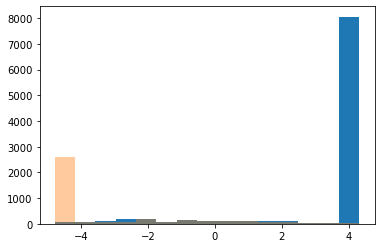

In [168]:
plt.hist(scorebyword, bins=15)
plt.hist(scorebyword2, bins=15, alpha=0.4)

In [29]:
# and these look like the number of distinct tokens.
len(d1.keys()), len(d2.keys()) 

(9525, 3756)

In [30]:
# Ten thousand words.  This is reasonable.

In [31]:
teststring = "Hey, what's up rich?"
teststring2 = "Do you want free airtime?"

In [148]:
# here is the frequency data I need.
# Word, ham_occur, ham_total, spam_occur, spam_total
print("Word\tham_occ\tham_tot\tspam_occ\tspam_tot")
# Here is a for loop that looks at one word at at time and
# prints the occurrence in the two training corpora:"
for token in nltk.word_tokenize(teststring):
    print(token, '\t', end="" )
    print(d1[token] , '\t',  d1.N(),'\t', d2[token], 
          '\t', d2.N())

Word	ham_occ	ham_tot	spam_occ	spam_tot
Hey 	89 	 100259 	 5 	 23616
, 	15969 	 100259 	 2612 	 23616
what 	146 	 100259 	 14 	 23616
's 	422 	 100259 	 68 	 23616
up 	260 	 100259 	 19 	 23616
rich 	3 	 100259 	 0 	 23616
? 	1375 	 100259 	 175 	 23616


In [72]:
DEBUG=0
def score(utterance):
    cumscore = 0
    NHAM = d1.N()
    NSPAM = d2.N()
    MAXSCORE = np.log(20) / np.log(2)
    MINSCORE_HAM = np.log( 0.1 / d1.N() ) / np.log(2)
    MINSCORE_SPAM = np.log( 0.1 / d2.N() ) / np.log(2)

    for token in nltk.word_tokenize(utterance):
        partialscore=0  # Catchall if a word has too few instances
        if d1[token] != 0 and d2[token] != 0 and (d1[token]+d2[token]):
            partialscore = (np.log(d1[token]) - np.log(NHAM) -
                            np.log(d2[token])  + np.log(NSPAM))/np.log(2) 
            partialscore = np.minimum(MAXSCORE, np.maximum(-MAXSCORE, partialscore))
            if DEBUG: 
                print(partialscore, d1[token], d2[token])
        if d1[token] == 0 and d2[token] > 0:
            partialscore = -MAXSCORE
        if d2[token] == 0 and d1[token]> 0 :
            partialscore = MAXSCORE
        if d2[token] == 0 and d1[token] == 0 :
            partialscore = MINSCORE_HAM - MINSCORE_SPAM 
        cumscore = cumscore + partialscore
    return(cumscore)

In [36]:
score(teststring)

11.336960368398168

In [37]:
score(teststring2)

3.747649031620144

In [61]:
def p(odds):
    return odds / (1+odds)

In [63]:
scores = []
for t in spam.text.values[0:10]:   # I don't want to print 5000 scores.
    print(score(t))
    scores.append(score(t))
scores = []
for t in spam.text.values:
    scores.append(score(t))

63.6541432519722
33.47842518494019
-98.10476310496313
39.85186056791977
49.6185549974702
-15.087103578970435
36.34457443612968
39.04413253101285
-81.77733052642776
-74.51075799948454


(array([ 10.,  23.,  47.,  59.,  93.,  93.,  51.,  82.,  57.,  62.,  40.,
         28.,  25.,  21.,  25.,  12.,   8.,  40., 250., 643., 786., 653.,
        488., 387., 283., 241., 196., 158., 159., 141., 110.,  77.,  40.,
         37.,  27.,  21.,  15.,  12.,   7.,   8.,   8.,   7.,   4.,   3.,
          3.,   4.,   3.,   5.,   2.,   3.,   1.,   2.,   1.,   0.,   4.,
          0.,   0.,   0.,   1.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          2.,   0.,   2.,   0.,   0.,   0.,   0.,   0.,   0.,   1.,   1.,
          1.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          1.]),
 array([-103.83671382,  -97.82217824,  -91.80764265,  -85.79310707,
         -79.77857149,  -73.7640359 ,  -67.74950032,  -61.73496473,
         -55.72042915,  -49.70589357,  -43.69135798,  -37.6768224 ,
         -31.66228682,  -25.64775123,  -19.63321565,  -13.61868006,
          -7.60414448,   -1.5896089 ,    4.424

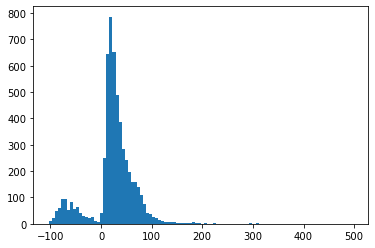

In [64]:
plt.hist(scores, bins=100)

In [65]:
# This would be a lot more interesting if it were class-conditional.
scores_ham = []
scores_spam = []
for t in spam.query("label=='ham'").text.values:
    scores_ham.append(score(t))
for t in spam.query("label=='spam'").text.values:
    scores_spam.append(score(t))
    

In [93]:
# It would be helpful later on if I just added a column to the spam dataframe:
scores_all = [ score(t) for t in spam.text.values ] 
spam [ "scores" ] = scores_all

/var/folders/mx/y31t86kn4_xbvbmf4k8f7xd00000gp/T/ipykernel_43205/2662411984.py:6: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "bbbox_inches" which is no longer supported as of 3.3 and will become an error in 3.6
  plt.savefig("SPAMSPAMSPAMSPAM.png", dpi=300, bbbox_inches="tight")


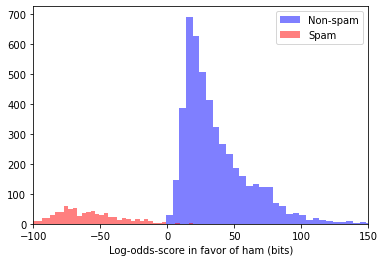

In [66]:
plt.hist(scores_ham, bins=100, color="blue", alpha=0.5, label="Non-spam")
plt.hist(scores_spam, bins=40, color="red", alpha=0.5, label="Spam")
plt.xlabel("Log-odds-score in favor of ham (bits)")
plt.xlim(-100, 150)
plt.legend()
plt.savefig("SPAMSPAMSPAMSPAM.png", dpi=300, bbbox_inches="tight")

In [67]:
def logistic(x):
    return 1 /( 1+ np.exp(-x))

/var/folders/mx/y31t86kn4_xbvbmf4k8f7xd00000gp/T/ipykernel_43205/4180805268.py:7: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "bbbox_inches" which is no longer supported as of 3.3 and will become an error in 3.6
  plt.savefig("PROBABILITYHAM.png", dpi=300, bbbox_inches="tight")


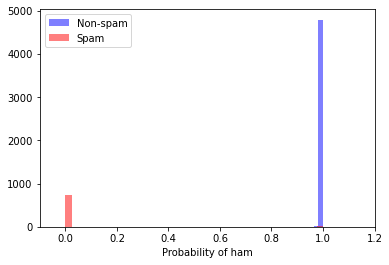

In [69]:
# This would look different if we transformed log-odds back into probability:
plt.hist(logistic(np.array(scores_ham)), bins=40, color="blue", alpha=0.5, label="Non-spam")
plt.hist(logistic(np.array(scores_spam)), bins=40, color="red", alpha=0.5, label="Spam")
plt.xlabel("Probability of ham")
plt.xlim(-0.1, 1.2)
plt.legend()
plt.savefig("PROBABILITYHAM.png", dpi=300, bbbox_inches="tight")

In [41]:
americancorpus = pd.read_csv("../data/master_corpus.txt", sep="\t", encoding="latin-1")
len(americancorpus)

4934

In [42]:
americancorpus

,class,subscriber,message_body,timestamp,type
0,0,1,Hey sir I have a question on software I am doi...,4/4/11 14:40,Incoming
1,0,1,s the same guys name as the first but it will ...,4/4/11 14:40,Incoming
2,0,1,thing that I have to do to allow me to do it,4/4/11 14:40,Incoming
3,0,1,"The identity field must be unique, but you can...",4/4/11 14:41,Outgoing
4,0,1,Ok thank u sir,4/4/11 14:42,Incoming
...,...,...,...,...,...
4929,0,156,of course,4/3/12 15:51,Outgoing
4930,0,148,I heard,4/3/12 19:03,Incoming
4931,0,154,Oh well,4/3/12 19:03,Incoming
4932,0,156,cu in 20,4/3/12 19:03,Outgoing


In [73]:
am_incoming = americancorpus.query("type == 'Incoming'")[["message_body"]]
am_outcoming = americancorpus.query("type == 'Outgoing'")[["message_body"]]
len(am_incoming), len(am_outcoming), len(am_incoming)+ len(am_outcoming), len(americancorpus)


(2635, 2299, 4934, 4934)

In [74]:
# Calculate all the scores
incoming_scores = []
for i in am_incoming.message_body:
    incoming_scores.append( score(i))
outcoming_scores = []
for i in am_outcoming.message_body:
    outcoming_scores.append( score(i))

(array([5.220e+02, 1.372e+03, 3.060e+02, 7.400e+01, 1.800e+01, 3.000e+00,
        0.000e+00, 1.000e+00, 1.000e+00, 2.000e+00]),
 array([-13.66971187,   3.63629185,  20.94229557,  38.24829929,
         55.55430301,  72.86030673,  90.16631045, 107.47231417,
        124.77831789, 142.08432161, 159.39032533]),
 <BarContainer object of 10 artists>)

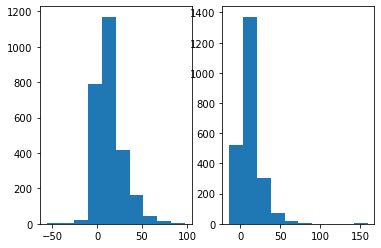

In [76]:
plt.subplot(121)
plt.hist(incoming_scores)
plt.subplot(122)
plt.hist(outcoming_scores)


Text(0, 0.5, 'number of messages')

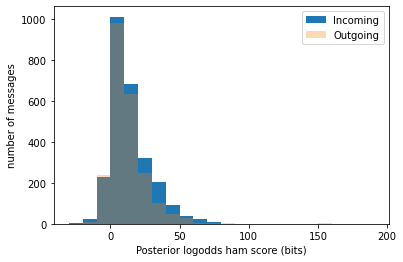

In [82]:
bins=np.arange(-30,200,10)
plt.hist(incoming_scores, bins=bins, label="Incoming")
plt.hist(outcoming_scores, bins=bins, alpha=0.3, label="Outgoing")
plt.legend()
plt.xlabel("Posterior logodds ham score (bits)")
plt.ylabel("number of messages")

Text(0, 0.5, 'number of messages')

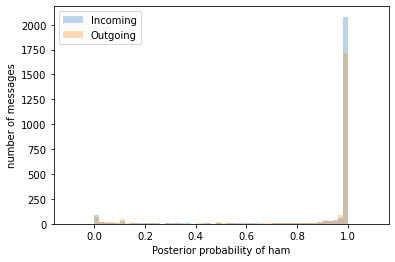

In [80]:

bins=np.arange(-0.1,1.1,0.02)
plt.hist(logistic(np.array(incoming_scores)), bins=bins, alpha=0.3, label="Incoming")
plt.hist(logistic(np.array(outcoming_scores)), bins=bins, alpha=0.3, label="Outgoing")
plt.legend()
plt.xlabel("Posterior probability of ham")
plt.ylabel("number of messages")

plt.title

In [ ]:
# Well, this is the first time I've been disappointed not to see more spam...


In [96]:
# To understand the data, now let's sort the ham and spam corpora by spamscores:
spam_t = spam.query("label=='spam'").sort_values("scores")
ham_t = spam.query("label=='ham'").sort_values("scores")


In [97]:
spam_t.head()

,label,text,scores
2482,spam,"""Urgent! call 09066612661 from landline. Your ...",-103.836714
4580,spam,"""Urgent! call 09066350750 from your landline. ...",-102.466528
845,spam,"""Urgent! call 09066350750 from your landline. ...",-101.820251
5295,spam,Urgent! Please call 09061213237 from landline....,-99.870791
4753,spam,Your weekly Cool-Mob tones are ready to downlo...,-98.243827


In [100]:
# The spammiest spam:
spam_t.loc[2482].text

'"Urgent! call 09066612661 from landline. Your complementary 4* Tenerife Holiday or å£10,000 cash await collection SAE T&Cs PO Box 3 WA14 2PX 150ppm 18+ Sender: Hol Offer",,,\n'

In [103]:
# The spammiest ham: 
ham_t.iloc[0:5].text

4895                          Send me the new number,,,\n
2290                     Dont you have message offer,,,\n
2174    Yavnt tried yet and never played original eith...
1083               Can u get pic msgs to your phone?,,,\n
3416                         No pic. Please re-send.,,,\n
Name: text, dtype: object

In [144]:
# The hammiest spam: 
spam_t.tail(10).text

2431    Guess who am I?This is the first time I create...
69      "Did you hear about the new \Divorce Barbie\""...
4677    "Hi babe its Chloe, how r u? I was smashed on ...
752     "Do you realize that in about 40 years, we'll ...
2775    How come it takes so little time for a child w...
5373    dating:i have had two of these. Only started a...
3361    Sorry I missed your call let's talk when you h...
3420    LIFE has never been this much fun and great un...
2966    "Do you ever notice that when you're driving, ...
2664    "Hello darling how are you today? I would love...
Name: text, dtype: object

In [134]:
# I can't read the entire messages.  Need to loop through them..
for i in spam_t.tail():
    print(i)

label
text
scores


In [135]:
# Well, that didn't work. Uh.. what are the methods that I can call on type(spam_t.tail()) ?

In [123]:
spam_t.tail()

,label,text,scores
5373,spam,dating:i have had two of these. Only started a...,8.156495
3361,spam,Sorry I missed your call let's talk when you h...,16.780934
3420,spam,LIFE has never been this much fun and great un...,18.072221
2966,spam,"""Do you ever notice that when you're driving, ...",23.099635
2664,spam,"""Hello darling how are you today? I would love...",29.235709


In [125]:
dir(spam_t.tail())

['T',
 '_AXIS_LEN',
 '_AXIS_ORDERS',
 '_AXIS_TO_AXIS_NUMBER',
 '_HANDLED_TYPES',
 '__abs__',
 '__add__',
 '__and__',
 '__annotations__',
 '__array__',
 '__array_priority__',
 '__array_ufunc__',
 '__array_wrap__',
 '__bool__',
 '__class__',
 '__contains__',
 '__copy__',
 '__deepcopy__',
 '__delattr__',
 '__delitem__',
 '__dict__',
 '__dir__',
 '__divmod__',
 '__doc__',
 '__eq__',
 '__finalize__',
 '__floordiv__',
 '__format__',
 '__ge__',
 '__getattr__',
 '__getattribute__',
 '__getitem__',
 '__getstate__',
 '__gt__',
 '__hash__',
 '__iadd__',
 '__iand__',
 '__ifloordiv__',
 '__imod__',
 '__imul__',
 '__init__',
 '__init_subclass__',
 '__invert__',
 '__ior__',
 '__ipow__',
 '__isub__',
 '__iter__',
 '__itruediv__',
 '__ixor__',
 '__le__',
 '__len__',
 '__lt__',
 '__matmul__',
 '__mod__',
 '__module__',
 '__mul__',
 '__ne__',
 '__neg__',
 '__new__',
 '__nonzero__',
 '__or__',
 '__pos__',
 '__pow__',
 '__radd__',
 '__rand__',
 '__rdivmod__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 

In [145]:
# Iterrows looks promising.  
# The hammiest spam
for r in spam_t.tail().iterrows():
    print(r[1].text)

dating:i have had two of these. Only started after i sent a text to talk sport radio last week. Any connection do you think or coincidence?,,,

Sorry I missed your call let's talk when you have the time. I'm on 07090201529,,,

LIFE has never been this much fun and great until you came in. You made it truly special for me. I won't forget you! enjoy @ one gbp/sms,,,

"Do you ever notice that when you're driving, anyone going slower than you is an idiot and everyone driving faster than you is a maniac?",,,

"Hello darling how are you today? I would love to have a chat, why dont you tell me what you look like and what you are in to sexy?",,,



In [146]:
# That leaves the hammiest ham 
for r in ham_t.tail().iterrows():
    print(r[1].text)

"Sad story of a Man - Last week was my b'day. My Wife did'nt wish me. My Parents forgot n so did my Kids . I went to work. Even my Colleagues did not wish. As I entered my cabin my PA said, '' Happy B'day Boss !!''. I felt special. She askd me 4 lunch. After lunch she invited me to her apartment. We went there. She said,'' do u mind if I go into the bedroom for a minute ? '' ''OK'', I sed in a sexy mood. She came out 5 minuts latr wid a cake...n My Wife, My Parents, My Kidz, My Friends n My Colleagues. All screaming.. SURPRISE !! and I was waiting on the sofa.. ... ..... ' NAKED...!",,,

For me the love should start with attraction.i should feel that I need her every time around me.she should be the first thing which comes in my thoughts.I would start the day and end it with her.she should be there every time I dream.love will be then when my every breath has her name.my life should happen around her.my life will be named to her.I would cry for her.will give all my happiness and take a

In [147]:
# These are pretty long.


In [170]:
DEBUG=0
def scoreperword(utterance):
    cumscore = 0
    NHAM = d1.N()
    NSPAM = d2.N()
    MAXSCORE = np.log(20) / np.log(2)
    MINSCORE_HAM = np.log( 0.1 / d1.N() ) / np.log(2)
    MINSCORE_SPAM = np.log( 0.1 / d2.N() ) / np.log(2)

    for token in nltk.word_tokenize(utterance):
        partialscore=0  # Catchall if a word has too few instances
        if d1[token] != 0 and d2[token] != 0 and (d1[token]+d2[token]):
            partialscore = (np.log(d1[token]) - np.log(NHAM) -
                            np.log(d2[token])  + np.log(NSPAM))/np.log(2) 
            partialscore = np.minimum(MAXSCORE, np.maximum(-MAXSCORE, partialscore))
            if DEBUG: 
                print(partialscore, d1[token], d2[token])
        if d1[token] == 0 and d2[token] > 0:
            partialscore = -MAXSCORE
        if d2[token] == 0 and d1[token]> 0 :
            partialscore = MAXSCORE
        if d2[token] == 0 and d1[token] == 0 :
            partialscore = MINSCORE_HAM - MINSCORE_SPAM 
        cumscore = cumscore + partialscore
    return(cumscore/ len(utterance.split()))

In [173]:
# It would be helpful later on if I just added a column to the spam dataframe:
scorepw_all = [ scoreperword(t) for t in spam[1].values ] 
spam [ "scorepw" ] = scorepw_all

(array([  1.,   1.,   1.,   0.,   0.,   1.,   0.,   1.,   4.,  40., 110.,
        200., 137., 132.,  51.,  38.,  13.,   8.,   5.,   4.]),
 array([-8.38111345, -7.90612133, -7.43112921, -6.95613709, -6.48114497,
        -6.00615285, -5.53116074, -5.05616862, -4.5811765 , -4.10618438,
        -3.63119226, -3.15620014, -2.68120802, -2.2062159 , -1.73122378,
        -1.25623166, -0.78123954, -0.30624742,  0.1687447 ,  0.64373682,
         1.11872894]),
 <BarContainer object of 20 artists>)

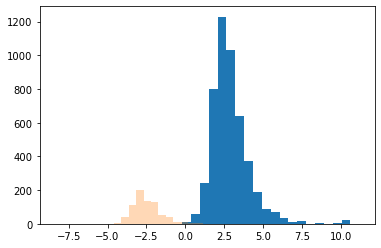

In [178]:
plt.hist(spam.query("label == 'ham'").scorepw, bins=20)
plt.hist(spam.query("label == 'spam'").scorepw, bins=20, alpha=0.3)